In [1]:
%matplotlib inline
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('Data Set',data.shape)
print('Test Set',test.shape)

Data Set (891, 12)
Test Set (418, 11)


In [2]:
print('Data Set \n',data.isnull().sum())
print('---------------')
print('Test Set \n',test.isnull().sum())

Data Set 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
---------------
Test Set 
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Visualization

In [5]:
sns.set()

In [6]:
def bar_ch(para,tf):
    survived = data[data['Survived']==1][para].value_counts()
    dead = data[data['Survived']==0][para].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index=['Survived','Dead']
    df.plot(kind='bar',stacked = tf,figsize =(10,5))

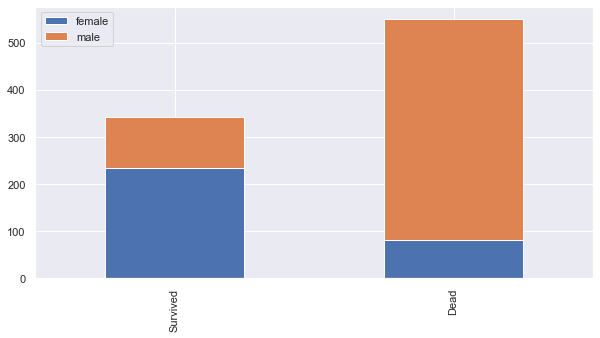

In [7]:
bar_ch('Sex',True)

Females are more likely to Survive than male

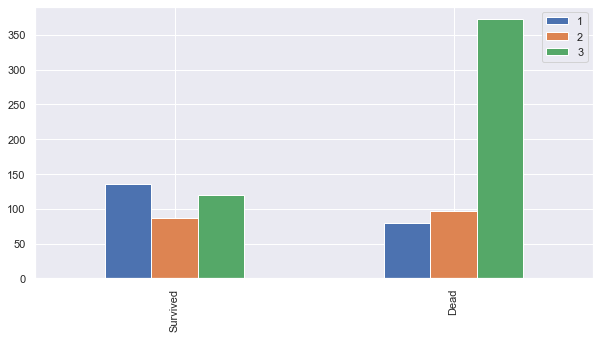

In [8]:
bar_ch('Pclass',False)

Out Of survived 1st Class has more Survival Chance and 2nd has the least.
3rd class are most likely to have died

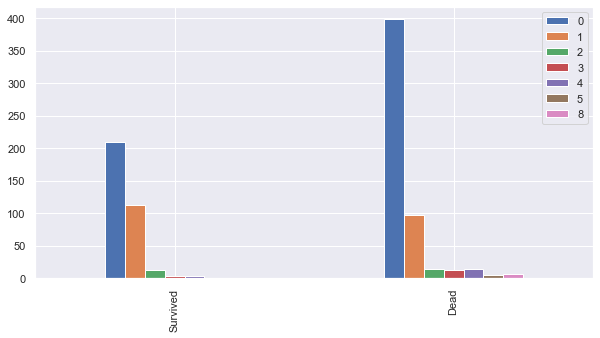

In [9]:
bar_ch('SibSp',False)

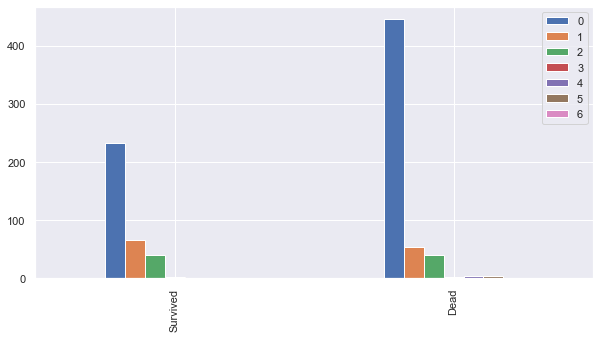

In [10]:
bar_ch('Parch',False)

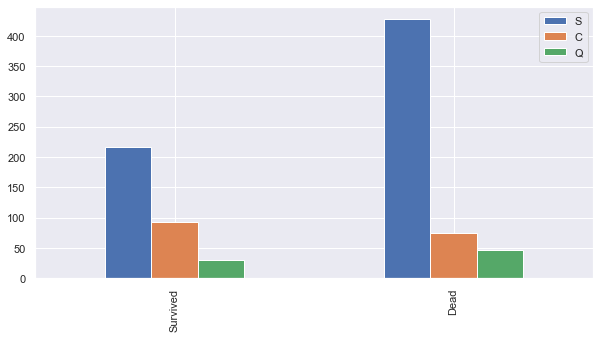

In [11]:
bar_ch('Embarked',False)

In [12]:
data.Sex.replace(['male','female'],[1,0],inplace = True)
test.Sex.replace(['male','female'],[1,0],inplace = True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [13]:
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
data['Title'].value_counts()
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

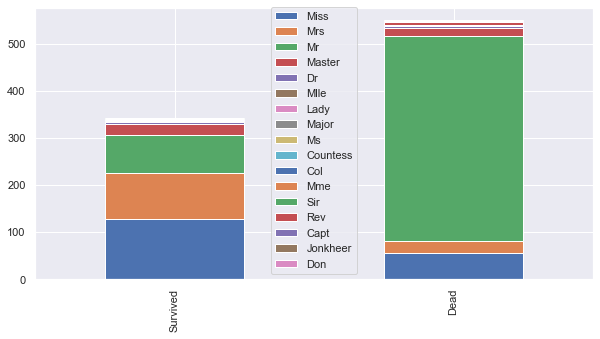

In [14]:
bar_ch('Title',True)

In [15]:
data.Title.replace(['Mr','Miss','Mrs','Master','Dr','Rev','Col','Major','Mlle','Don','Ms','Lady','Capt','Sir','Mme','Countess','Jonkheer'],[0,1,2,3,0,4,4,4,4,4,1,2,4,4,4,4,4],inplace = True)
test.Title.replace(['Mr','Miss','Mrs','Master','Dr','Rev','Col','Major','Mlle','Don','Ms','Lady','Capt','Sir','Mme','Countess','Jonkheer','Dona'],[0,1,2,3,0,4,4,4,4,4,1,2,4,4,4,4,4,4],inplace = True)

In [16]:
data.drop('Name',axis = 1,inplace = True)
test.drop('Name',axis = 1,inplace = True)
data.drop('Ticket',axis = 1,inplace = True)
test.drop('Ticket',axis = 1,inplace = True)

In [17]:
data.Embarked.replace(['S','C','Q'],[0,1,2],inplace = True)
test.Embarked.replace(['S','C','Q'],[0,1,2],inplace = True)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,1,22.0,1,0,7.2500,NaN,0.0,0
1,2,1,1,0,38.0,1,0,71.2833,C85,1.0,2
2,3,1,3,0,26.0,0,0,7.9250,NaN,0.0,1
3,4,1,1,0,35.0,1,0,53.1000,C123,0.0,2
4,5,0,3,1,35.0,0,0,8.0500,NaN,0.0,0


In [18]:
data['Age'].fillna(data.groupby('Title')['Age'].transform('median'),inplace = True)
test['Age'].fillna(data.groupby('Title')['Age'].transform('median'),inplace = True)

In [19]:
data['Fare'].fillna(data.groupby('Pclass')['Fare'].transform('median'),inplace = True)
test['Fare'].fillna(data.groupby('Pclass')['Fare'].transform('median'),inplace = True)

In [20]:
data['Embarked'].fillna(3,inplace = True)
test['Embarked'].fillna(3,inplace = True)

In [21]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [22]:
data['Cabin']= data['Cabin'].str[:1]
data['Cabin']

0      NaN
1        C
2      NaN
3        C
4      NaN
5      NaN
6        E
7      NaN
8      NaN
9      NaN
10       G
11       C
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21       D
22     NaN
23       A
24     NaN
25     NaN
26     NaN
27       C
28     NaN
29     NaN
      ... 
861    NaN
862      D
863    NaN
864    NaN
865    NaN
866    NaN
867      A
868    NaN
869    NaN
870    NaN
871      D
872      B
873    NaN
874    NaN
875    NaN
876    NaN
877    NaN
878    NaN
879      C
880    NaN
881    NaN
882    NaN
883    NaN
884    NaN
885    NaN
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

In [23]:
test['Cabin']= test['Cabin'].str[:1]
data.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

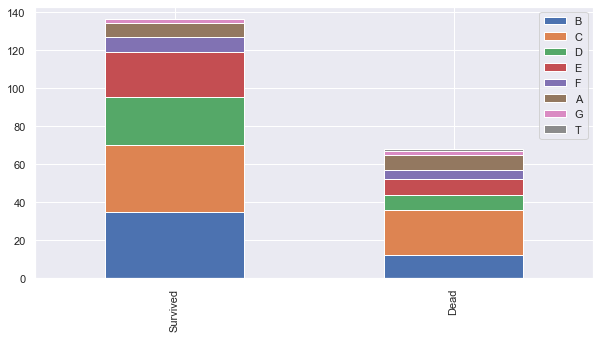

In [24]:
bar_ch('Cabin',True)

In [25]:
data.Cabin.replace(['A','B','C','D','E','F','G','T'],[0,0.4,0.8,1.2,1.6,2.0,2.4,2.8], inplace = True)
data['Cabin'].fillna(data.groupby('Title')['Cabin'].transform('median'),inplace = True)
test.Cabin.replace(['A','B','C','D','E','F','G','T'],[0,0.4,0.8,1.2,1.6,2.0,2.4,2.8], inplace = True)
test['Cabin'].fillna(data.groupby('Title')['Cabin'].transform('median'),inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Cabin          891 non-null float64
Embarked       891 non-null float64
Title          891 non-null int64
dtypes: float64(4), int64(7)
memory usage: 76.6 KB


In [26]:
print('Data Set \n',data.isnull().sum())
print('-------xxxx-------')
print('Test Set \n',test.isnull().sum())
data.Fare

Data Set 
 PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64
-------xxxx-------
Test Set 
 PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64


0        7.2500
1       71.2833
2        7.9250
3       53.1000
4        8.0500
5        8.4583
6       51.8625
7       21.0750
8       11.1333
9       30.0708
10      16.7000
11      26.5500
12       8.0500
13      31.2750
14       7.8542
15      16.0000
16      29.1250
17      13.0000
18      18.0000
19       7.2250
20      26.0000
21      13.0000
22       8.0292
23      35.5000
24      21.0750
25      31.3875
26       7.2250
27     263.0000
28       7.8792
29       7.8958
         ...   
861     11.5000
862     25.9292
863     69.5500
864     13.0000
865     13.0000
866     13.8583
867     50.4958
868      9.5000
869     11.1333
870      7.8958
871     52.5542
872      5.0000
873      9.0000
874     24.0000
875      7.2250
876      9.8458
877      7.8958
878      7.8958
879     83.1583
880     26.0000
881      7.8958
882     10.5167
883     10.5000
884      7.0500
885     29.1250
886     13.0000
887     30.0000
888     23.4500
889     30.0000
890      7.7500
Name: Fare, Length: 891,

In [27]:
train_test_data = [data, test]
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 18, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 20, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 20) & (dataset['Fare'] <= 50), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 50) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3



In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [29]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,1,1.0,1,0,0.0,0.8,0.0,0
1,2,1,1,0,3.0,1,0,2.0,0.8,1.0,2
2,3,1,3,0,1.0,0,0,0.0,0.8,0.0,1
3,4,1,1,0,2.0,1,0,2.0,0.8,0.0,2
4,5,0,3,1,2.0,0,0,0.0,0.8,0.0,0


In [30]:
#data['Embarked'].fillna(0,inplace =True)
data['Embarked'].isnull().sum()

0

In [31]:
data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.030334,-0.057527,-0.001652,0.008879,-0.046331,-0.029906,-0.003799
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.087806,-0.035322,0.081629,0.307955,0.100103,0.118026,0.424745
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.308406,0.083081,0.018443,-0.717085,0.073562,0.028566,-0.150894
Sex,0.042939,-0.543351,0.131900,1.000000,0.138022,-0.114631,-0.245489,-0.221484,-0.004948,-0.128526,-0.539596
Age,0.030334,-0.087806,-0.308406,0.138022,1.000000,-0.254139,-0.165578,0.121114,-0.164087,-0.012726,-0.150649
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.254139,1.000000,0.414838,0.282011,0.176299,-0.063794,0.270532
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.165578,0.414838,1.000000,0.289405,0.130914,-0.082144,0.336259
Fare,0.008879,0.307955,-0.717085,-0.221484,0.121114,0.282011,0.289405,1.000000,-0.025128,0.021382,0.226943
Cabin,-0.046331,0.100103,0.073562,-0.004948,-0.164087,0.176299,0.130914,-0.025128,1.000000,-0.071008,0.179240
Embarked,-0.029906,0.118026,0.028566,-0.128526,-0.012726,-0.063794,-0.082144,0.021382,-0.071008,1.000000,0.050529


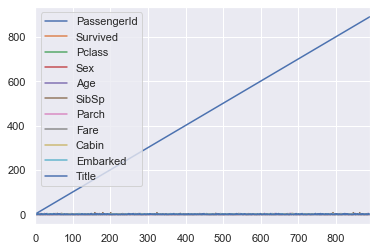

In [32]:
## sib parch not req

## KNN

In [33]:
x_train,x_test,y_train,y_test = train_test_split(data[['Pclass','Sex','Age','Fare','Cabin','Embarked','Title']] ,data['Survived'] ,test_size = 0.35,random_state = 4)

In [34]:
#res = []
#for n in range(3,30):
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
#acc =metrics.accuracy_score(knn.predict(x_test),y_test)
#res.append(acc)
#plt.plot([x for x in range(3,30)],res)
metrics.accuracy_score(knn.predict(x_test),y_test)

0.8237179487179487

In [95]:
prediction = knn.predict(test[['Pclass','Sex','Age','Fare','Cabin','Embarked','Title']])

In [96]:
sol = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

In [97]:
sol

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [98]:
sol.to_csv('sol6.csv', index=False)

# LOGISTIC REGRESSION

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
prediction3 = lr.predict(test[['Pclass','Sex','Age','Fare','Cabin','Embarked','Title']])
metrics.accuracy_score(lr.predict(x_test),y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8173076923076923

In [106]:
prediction3

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [107]:
sol4 = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction3
    })

In [108]:
sol4.to_csv('sol.csv',index=False)

## SVM

In [37]:
sm = SVC()
sm.fit(data[['Pclass','Sex','Age','Fare','Cabin','Embarked','Title']],data['Survived'])


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [38]:
pred_svm = sm.predict(test[['Pclass','Sex','Age','Fare','Cabin','Embarked','Title']])
metrics.accuracy_score(sm.predict(x_test),y_test)

0.8653846153846154

In [40]:
subb = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": pred_svm
    })
subb.to_csv('submission1.csv', index=False)

In [37]:
subb

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


## SVM model gave the hightest accuracy(86.538)
## hence svm model was submitted in the competition which gave us a score of 0.799 and a rank of #1592 at the time of submission